# Part 1: Data Preprocessing

Dataset link: [AILab-Breast Cancer Wisconsin](https://www.kaggle.com/competitions/ai-lab-breast-cancer-wisconsin/leaderboarda)

## Importing the libraries

In [153]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
import random
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, MaxPooling2D, Flatten, Convolution2D
from keras.losses import BinaryCrossentropy

## Dealing dataset

In [154]:
dataset = pd.read_csv('_train.csv')

In [155]:
# dataset["diagnosis"].replace('B', 0, inplace=True)
# dataset["diagnosis"].replace('M', 1, inplace=True)

In [156]:
dataset

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,1,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.228300,0.128000,...,23.680,29.43,158.80,1696.0,0.13470,0.33910,0.49320,0.19230,0.3294,0.09469
1,1,1,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,2,0,13.200,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,14.410,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385
3,3,0,14.580,13.66,94.29,658.8,0.09832,0.08918,0.082220,0.043490,...,16.760,17.24,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048
4,4,0,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.012820,...,9.845,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,926424,1,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.243900,0.138900,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115
963,926682,1,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637
964,926954,1,16.600,28.08,108.30,858.1,0.08455,0.10230,0.092510,0.053020,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820
965,927241,1,20.600,29.33,140.10,1265.0,0.11780,0.27700,0.351400,0.152000,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.93870,0.26500,0.4087,0.12400


In [157]:
dataset.shape

(967, 32)

In [158]:
x = dataset.iloc[:, 2:].values

In [159]:
y = dataset.iloc[:, 1].values

In [160]:
x.shape, y.shape

((967, 30), (967,))

## Splitting the training data and testing data

In [161]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [162]:
x_train = x
y_train = y

In [163]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((967, 30), (194, 30), (967,), (194,))

## Feature Scaling

In [164]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Part 2: Building the model

## TensorFlow implementation

In [165]:
layer_1 = Dense(units=20, activation="sigmoid")
layer_2 = Dense(units=5, activation="sigmoid")
layer_3 = Dense(units=1, activation="sigmoid")

model = Sequential([layer_1, layer_2, layer_3])

model.compile(loss=BinaryCrossentropy())

model.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
31/31 [==============================] - 1s 2ms/step - loss: 0.9585
Epoch 2/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.8298
Epoch 3/1000
31/31 [==============================] - 0s 4ms/step - loss: 0.7448
Epoch 4/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.6839
Epoch 5/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.6355
Epoch 6/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.5934
Epoch 7/1000
31/31 [==============================] - 0s 4ms/step - loss: 0.5540
Epoch 8/1000
31/31 [==============================] - 0s 4ms/step - loss: 0.5171
Epoch 9/1000
31/31 [==============================] - 0s 4ms/step - loss: 0.4829
Epoch 10/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.4504
Epoch 11/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.4200
Epoch 12/1000
31/31 [==============================] - 0s 3ms/step - loss: 0.3934
Epoch 13/1000
31/31 [====

## Accuracy

In [166]:
y_hat = model.predict(x_test)
y_hat = y_hat.flatten()

7/7 [==============================] - 0s 2ms/step


In [167]:
y_hat

array([1.0000000e+00, 1.2551379e-07, 6.1857701e-09, 6.1819367e-09,
       6.1788130e-09, 1.0000000e+00, 1.0000000e+00, 6.3914221e-09,
       6.3187193e-09, 6.1780820e-09, 1.0000000e+00, 6.2186092e-09,
       6.1791074e-09, 6.2113070e-09, 6.2002043e-09, 6.1779408e-09,
       6.6954193e-09, 6.1770926e-09, 6.3653873e-09, 6.1758083e-09,
       6.1790368e-09, 8.2331702e-08, 7.1461579e-09, 6.2349397e-09,
       6.4558554e-09, 6.1736412e-09, 6.2951293e-09, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 6.1729821e-09, 6.1730172e-09,
       6.1748660e-09, 6.2241630e-09, 6.1758083e-09, 6.4841030e-09,
       1.5454688e-08, 6.3637970e-09, 1.0000000e+00, 1.0000000e+00,
       6.2957657e-09, 6.6317469e-08, 6.2298282e-09, 6.4012555e-09,
       6.1744894e-09, 7.3820776e-09, 7.5786755e-09, 6.1896412e-09,
       1.0000000e+00, 6.1857466e-09, 6.6365269e-09, 1.0000000e+00,
       1.0000000e+00, 6.2951293e-09, 1.0000000e+00, 6.5911139e-09,
       6.3243619e-09, 1.0572664e-08, 6.1744894e-09, 6.2170082e

In [168]:
def accuracy(y_hat, y, threshold):
    acc = 0
    for i in range(len(y)):
        if y[i] == 1:
            if y_hat[i] >= threshold:
                acc += 1
        else:
            if y_hat[i] < threshold:
                acc += 1
    return acc / len(y) * 100

In [169]:
thresholds = np.arange(0.1,1, step = 0.01)
acc = np.zeros_like(thresholds)
for i, threshold in enumerate(thresholds):
    acc[i] = accuracy(y_hat, y_test, threshold)
    print(f"threshold = {threshold:.2f}, accuracy = {acc[i]}") 

threshold = 0.10, accuracy = 100.0
threshold = 0.11, accuracy = 100.0
threshold = 0.12, accuracy = 100.0
threshold = 0.13, accuracy = 100.0
threshold = 0.14, accuracy = 100.0
threshold = 0.15, accuracy = 100.0
threshold = 0.16, accuracy = 100.0
threshold = 0.17, accuracy = 100.0
threshold = 0.18, accuracy = 100.0
threshold = 0.19, accuracy = 100.0
threshold = 0.20, accuracy = 100.0
threshold = 0.21, accuracy = 100.0
threshold = 0.22, accuracy = 100.0
threshold = 0.23, accuracy = 100.0
threshold = 0.24, accuracy = 100.0
threshold = 0.25, accuracy = 100.0
threshold = 0.26, accuracy = 100.0
threshold = 0.27, accuracy = 100.0
threshold = 0.28, accuracy = 100.0
threshold = 0.29, accuracy = 100.0
threshold = 0.30, accuracy = 100.0
threshold = 0.31, accuracy = 100.0
threshold = 0.32, accuracy = 100.0
threshold = 0.33, accuracy = 100.0
threshold = 0.34, accuracy = 100.0
threshold = 0.35, accuracy = 100.0
threshold = 0.36, accuracy = 100.0
threshold = 0.37, accuracy = 100.0
threshold = 0.38, ac

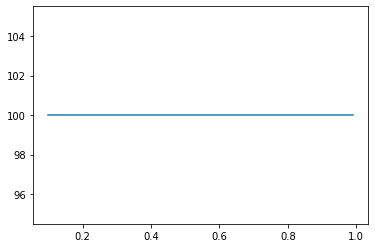

In [170]:
plt.plot(thresholds, acc)

# Part 3: Answer

## Dealing dataset

In [171]:
dataset_ans = pd.read_csv('test.csv')

In [172]:
dataset_ans.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,398,11.13,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,...,12.02,28.26,77.8,436.6,0.1087,0.1782,0.1564,0.06413,0.3169,0.08032
1,399,19.02,24.59,122.00,1076.0,0.09029,0.12060,0.14680,0.08271,0.1953,...,24.56,30.41,152.9,1623.0,0.1249,0.3206,0.5755,0.19560,0.3956,0.09288
2,400,23.09,19.83,152.10,1682.0,0.09342,0.12750,0.16760,0.10030,0.1505,...,30.79,23.87,211.5,2782.0,0.1199,0.3625,0.3794,0.22640,0.2908,0.07277
3,401,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,...,27.32,30.88,186.8,2398.0,0.1512,0.3150,0.5372,0.23880,0.2768,0.07615
4,402,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,...,17.46,37.13,124.1,943.2,0.1678,0.6577,0.7026,0.17120,0.4218,0.13410


In [173]:
x_ans = dataset_ans.iloc[:, 1:].values

## Feature Scaling

In [174]:
x_ans = sc.fit_transform(x_ans)

## Answer

In [175]:
y_ans = model.predict(x_ans)
y_ans = y_ans.flatten()

6/6 [==============================] - 0s 2ms/step


In [176]:
y_ans

array([6.17330009e-09, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       9.99999881e-01, 1.05020384e-08, 1.00000000e+00, 9.34714084e-09,
       1.00000000e+00, 6.22903196e-09, 6.18203089e-09, 6.17829432e-09,
       6.18197227e-09, 1.00000000e+00, 1.00000000e+00, 6.17538420e-09,
       6.25357899e-09, 6.17467766e-09, 6.17808205e-09, 9.99999344e-01,
       1.00000000e+00, 2.24405063e-08, 6.17810603e-09, 1.00000000e+00,
       6.20774232e-09, 6.17479534e-09, 6.19619689e-09, 6.24783203e-09,
       6.22203800e-09, 1.00000000e+00, 6.17914298e-09, 1.00000000e+00,
       6.98515912e-09, 6.17295859e-09, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.29986715e-08, 6.40494369e-09, 1.00000000e+00,
       6.18704421e-09, 6.19151841e-09, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 6.18015639e-09, 6.17569063e-09, 1.00000000e+00,
       6.19032603e-09, 1.00000000e+00, 7.51285878e-09, 1.00000000e+00,
      

In [177]:
def standardized_y(y_hat, threshold = 0.9):
    for i in range(len(y_hat)):
        if y_hat[i] >= threshold:
            y_hat[i] = 1
        else:
            y_hat[i] = 0
    return y_hat

In [178]:
y_ans = standardized_y(y_ans, 0.9)

In [179]:
for i in range(len(y_ans)):
    print(f"{y_ans[i]:.0f}")

0
1
1
1
1
1
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
0
0
1
1
0
0
1
0
0
0
0
0
1
0
1
0
0
1
1
1
0
0
1
0
0
1
1
1
0
0
1
0
1
0
1
1
0
0
0
1
0
0
0
0
0
0
1
0
1
0
1
1
0
1
1
0
0
1
0
0
0
0
0
1
0
0
1
1
0
0
0
0
1
0
1
1
0
1
0
1
1
0
1
0
0
0
1
0
0
1
1
1
0
1
0
0
1
1
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
